# Pymaceuticals Inc.
## Analysis Conclusion

- The bar chart shows that Capomulin and Ramicane have the most observation time points, indicating that researchers may have conducted more in-depth observations on these two drugs. Other drugs such as Ketapril, Naftisol, Zoniferol, Stelasyn, Placebo, Infubinol, and Ceftamin have relatively fewer observation time points but are also close to 200. Overall, the number of observation time points for most drug regimens is balanced, which helps ensure data integrity and result reliability.

- The pie chart shows that male mice account for 51% and female mice account for 49% in the experiment. The gender distribution is relatively balanced, which helps ensure the representativeness and reliability of the experimental results.

- The box plot shows that the tumor volumes in the Capomulin and Ramicane treatment groups are generally smaller, ranging between 30 to 45 mm³, with a lower median, indicating that these two drugs are more effective in reducing tumor volume. The interquartile range (IQR) for these two groups is also smaller, suggesting low dispersion of tumor volumes and concentrated data, which may imply more stable treatment effects. Meanwhile, there is an obvious outlier in the Infubinol group (indicated by a red dot), where the tumor volume is significantly lower than other data points; this could be due to individual differences or experimental error.

- The scatter plot shows a positive correlation (correlation coefficient = 0.84) between the weight of mice treated with Capomulin (grams) and the average tumor volume (cubic millimeters). The red regression line in the graph also demonstrates this linear relationship, indicating that as the weight of the mice increases, the average tumor volume tends to increase as well. This may suggest that weight should be considered as a factor in evaluating treatment efficacy.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(merge_df["Mouse ID"].unique())
print(mice_count)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find the duplicate records based on Mouse ID and Timepoint
duplicate_records = merge_df[merge_df.duplicated(subset=['Mouse ID',"Timepoint"], keep=False)]
duplicate_mouse_id = duplicate_records['Mouse ID'].unique()
print(duplicate_mouse_id)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_records

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
mice_count_of_clean_df = len(clean_df["Mouse ID"].unique())
mice_count_of_clean_df

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Assemble the resulting series into a single summary DataFrame.
import numpy as np

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen
regimen_groups_data = clean_df.groupby('Drug Regimen')

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = regimen_groups_data['Tumor Volume (mm3)'].mean()
median_tumor_vol = regimen_groups_data['Tumor Volume (mm3)'].median()
variance_tumor_vol = regimen_groups_data['Tumor Volume (mm3)'].var()
sample_size = regimen_groups_data['Tumor Volume (mm3)'].count()
std_tumor_vol = regimen_groups_data['Tumor Volume (mm3)'].std()
sem_tumor_vol = std_tumor_vol / np.sqrt(sample_size)

group_items = {
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Vaiance": variance_tumor_vol,
    "Tumor Volume Std. Dev.": std_tumor_vol,
    "Tumor Volume Std. Err.": sem_tumor_vol
}

regimen_summary = pd.DataFrame(group_items)
regimen_summary = regimen_summary.sort_values(by='Mean Tumor Volume', ascending=True)
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Vaiance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor_vol = 'mean',
    median_tumor_vol = 'median',
    variance_tumor_vol = 'var',
    std_tumor_vol = 'std',
    sem_tumor_vol = lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
)

regimen_summary_2 = regimen_summary_2.sort_values(by='mean_tumor_vol', ascending=True)
regimen_summary_2 = regimen_summary_2.reset_index()
regimen_summary_2

,Drug Regimen,mean_tumor_vol,median_tumor_vol,variance_tumor_vol,std_tumor_vol,sem_tumor_vol
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
3,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
4,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
5,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
6,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
7,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
8,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
9,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

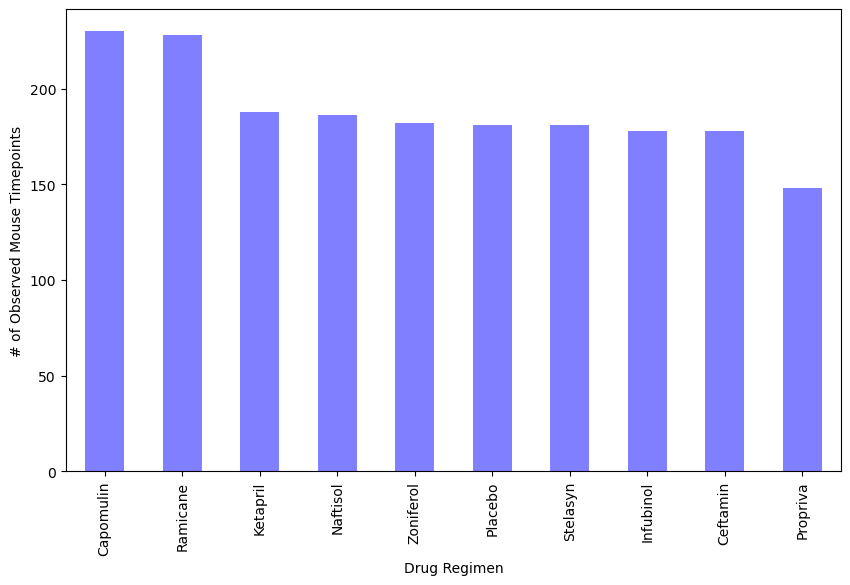

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue',figsize=[10, 6], alpha=0.5,
                    xlabel = "Drug Regimen",
                    ylabel = "# of Observed Mouse Timepoints",
                    rot = 90)

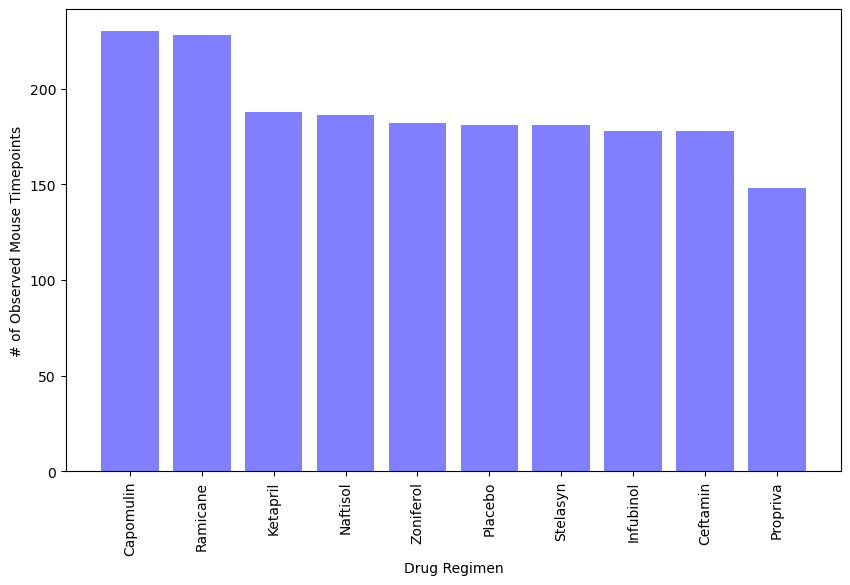

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

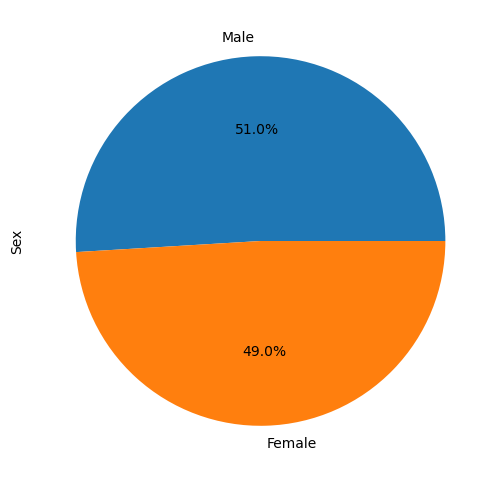

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_df['Sex'].value_counts()
gender_count.plot(kind='pie', figsize=[10, 6],
                  ylabel = "Sex",autopct='%1.1f%%')

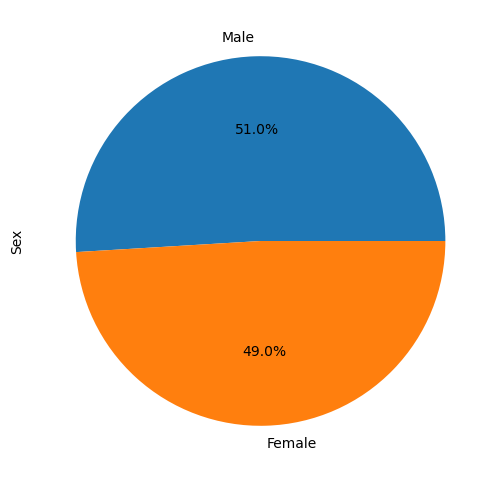

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_df = clean_df[clean_df['Drug Regimen'].isin(treatment_list)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoint = max_timepoint.rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merged_df = pd.merge(max_timepoint, treatment_df, left_on=['Mouse ID', 'Max Timepoint'], right_on=['Mouse ID', 'Timepoint'], how='left')

# Check the merged data
tumor_merged_df.head()

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,45,67.973419,2
1,a251,45,Infubinol,Female,21,25,45,65.525743,1
2,a275,45,Ceftamin,Female,20,28,45,62.999356,3
3,a411,45,Ramicane,Male,3,22,45,38.407618,1
4,a444,45,Ramicane,Female,10,25,45,43.047543,0


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = tumor_merged_df[tumor_merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # Add subset to the list
    tumor_vol_data.append(drug_data)

    # Calculate the interquartile range (IQR)
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine potential outliers' lower and upper bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # # Check the results
    # print(f"{drug} treatment IQR calculation:")
    # print(f"Lower quartile (Q1): {lowerq}")
    # print(f"Upper quartile (Q3): {upperq}")
    # print(f"Interquartile range (IQR): {iqr}")
    # print(f"Potential outliers lower bound: {lower_bound}")
    # print(f"Potential outliers upper bound: {upper_bound}")

    # Determine if there are any potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug}‘'s potential outliers: {outliers}\n")


Capomulin‘'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane‘'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol‘'s potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin‘'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



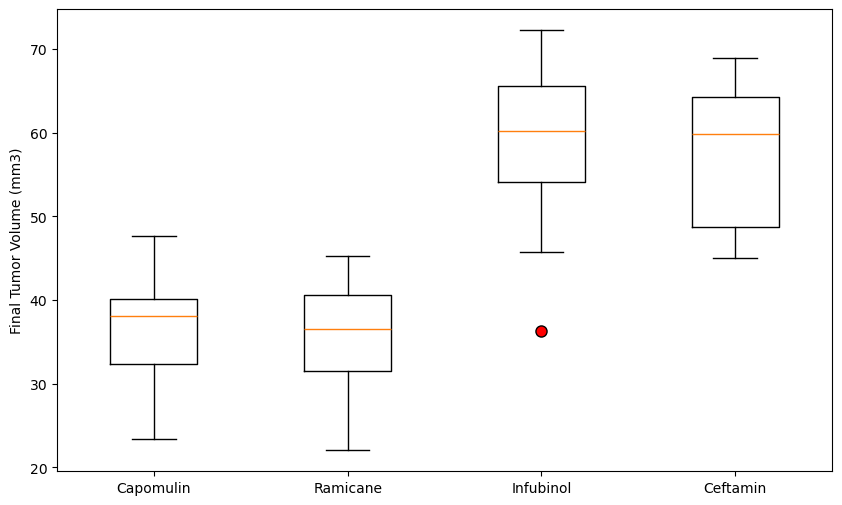

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Attributes of Configuration Anomalies
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse I509')

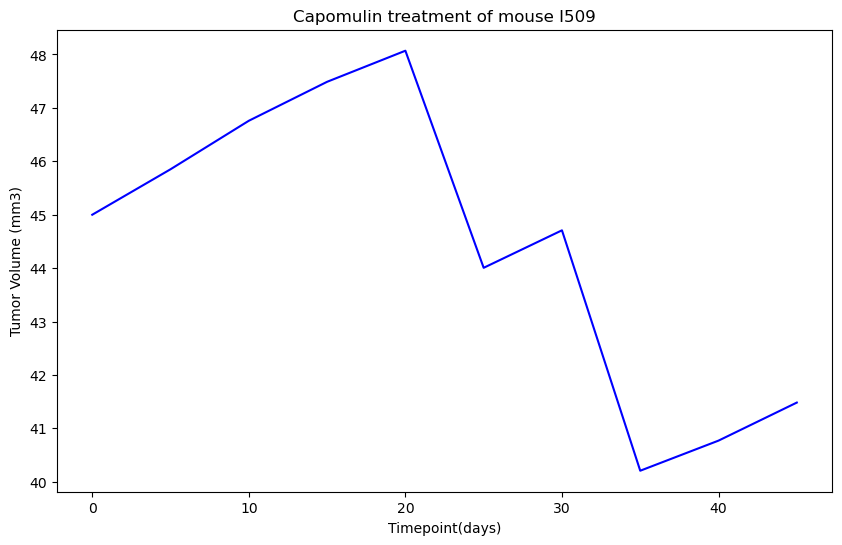

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Prepare the dataframe
mouse_id = 'l509'
treatment_method = "Capomulin"
# Filtered the data with "Mouse ID" is "l509" and "Drug Regimen" is "Capomulin"
mouse_data = clean_df[(clean_df["Mouse ID"] == mouse_id) & (clean_df["Drug Regimen"] == treatment_method)]

# Create the line chart: Capomulin treatment of mouse I509
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color='blue')
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")

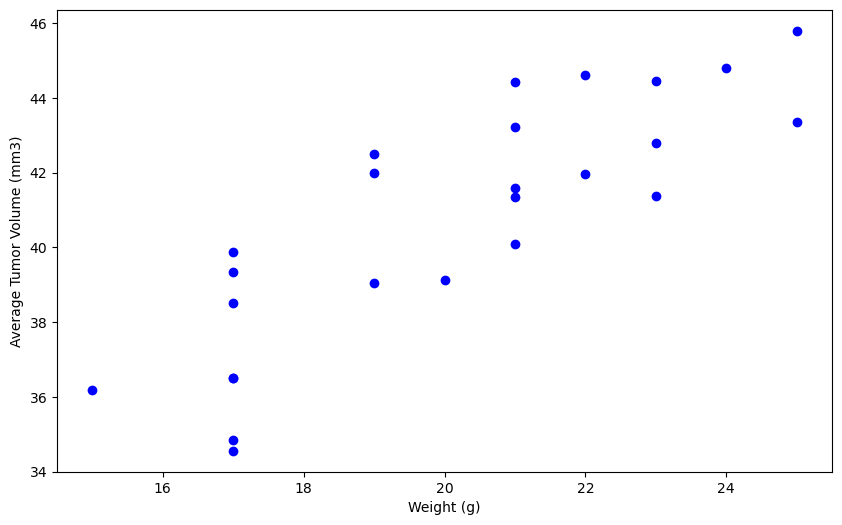

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin treatment regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol = avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})

# Get the weight of each mouse
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge average tumor volume and mouse weight data
merged_data = pd.merge(avg_tumor_vol, mouse_weight, on='Mouse ID')

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'], color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


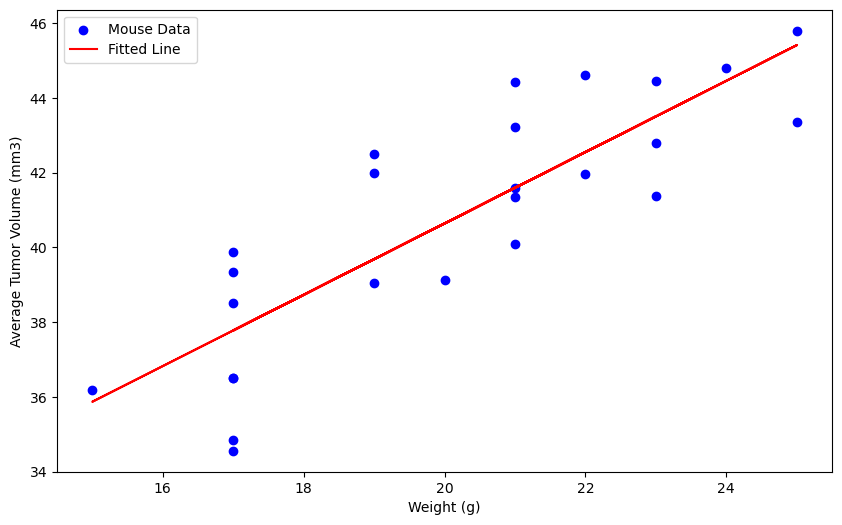

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0], 2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'])

# Generate regression line
regress_values = merged_data['Weight (g)'] * slope + intercept

# Generate scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'], color='b', label='Mouse Data')
plt.plot(merged_data['Weight (g)'], regress_values, color='r', label='Fitted Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show plot
plt.show()
